# 7. 多値分類
- アイリスデータセットで複数クラスを分類してみる

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch import nn
from torch import optim
from torchinfo import summary
from torchviz import make_dot
import matplotlib.pyplot as plt
import japanize_matplotlib
from tqdm import tqdm

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['axes.grid'] = True

In [2]:
#
# アイリスデータセットの読み込み
#

iris = load_iris()
x_org, y_org = iris.data, iris.target
print(x_org.shape)
print(y_org.shape)

# 入力データに関しては、sepal length(0)とpetal length(2)のみ抽出
x_select = x_org[:,[0,2]]

# 結果確認
print(x_select.shape)

(150, 4)
(150,)
(150, 2)


In [3]:
#
# データを学習 / 検証で分解
#

x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org,
    train_size=75, test_size=25,
    random_state=123)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75, 2)
(75,)
(25, 2)
(25,)


In [4]:
#
# データを正解値ごとに分割
#

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

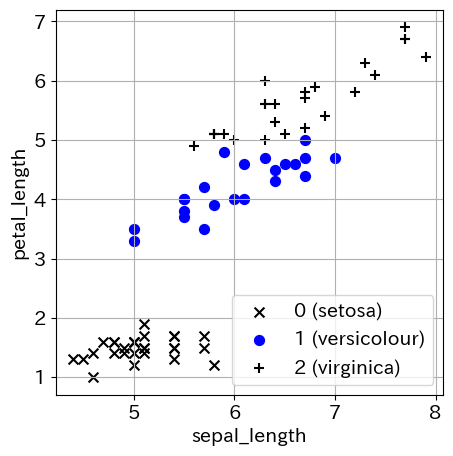

In [5]:
#
# 散布図によるデータの確認
#

plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [6]:
#
# モデル定義
#

# 入力次元数
n_input = x_train.shape[1]

# 出力次元数
n_output = len(list(set(y_train))) # 今回は3

In [7]:

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        # ここにソフトマックスレイヤを入れるケースもあるが，今回は損失関数にソフトマックスが入っているパターンで実装する
                
        # 初期値を全部1にする 
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
# インスタンスの生成
net = Net(n_input, n_output)  

In [8]:
#
# 入力データをテンソルに変換する 
#

# 入力変数x_trainと正解値 y_trainのテンソル変数化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long() # 整数でないとだめ

# 検証用変数のテンソル変数化

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long() # 整数でないとだめ

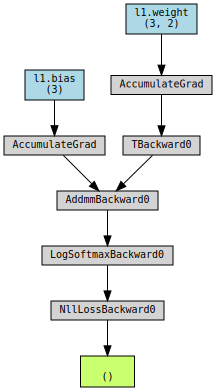

In [10]:
# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss() # この中にソフトマックスレイヤが入ってるのでNetで実装しなくて良い
# 最後のNNLossレイヤが入力が整数でないといけないので↑ではlong()に変換している

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 予測計算
outputs = net(inputs)

#  損失計算
loss = criterion(outputs, labels)

# 損失の計算グラフ可視化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [13]:
# 予測ラベルの取り出し方
# 行ごとに最大の値を出している
print(torch.max(outputs, axis=1))
print(torch.max(outputs, axis=1)[0].shape) # ソフトマックスに入れる前の値であることに注意

torch.return_types.max(
values=tensor([ 8.1000,  7.9000, 11.5000, 15.4000,  7.4000, 14.5000, 12.0000,  7.3000,
         7.5000, 11.0000,  9.3000, 15.3000,  8.1000,  7.7000, 10.7000,  9.5000,
         7.2000, 13.7000, 12.9000, 11.9000, 11.9000, 12.9000, 10.5000,  7.6000,
         6.7000, 12.6000,  7.8000,  7.4000, 12.4000, 11.7000, 10.5000, 10.2000,
        11.9000, 12.1000, 12.7000,  6.8000, 13.4000, 10.9000,  7.6000,  7.4000,
        12.9000, 11.7000, 15.4000, 15.6000,  8.0000, 11.9000, 10.2000, 12.0000,
         7.2000, 14.0000, 12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,
         7.3000, 11.1000, 12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000,
        11.7000, 13.3000,  7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,
         7.9000, 12.2000, 14.6000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [12]:
# こうすればラベルだけ出てくる
print(torch.max(outputs, axis=1)[1])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])


In [14]:
# 
# エポック回して最適化していく
#

# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))

# 繰り返し計算メインループ

for epoch in tqdm(range(num_epochs)):

    # 訓練フェーズ
    
    #勾配の初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 予測ラベル算出
    predicted = torch.max(outputs, 1)[1]

    # 損失と精度の計算
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    #予測フェーズ

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル算出
    predicted_test = torch.max(outputs_test, 1)[1]

    # 損失と精度の計算
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ((epoch) % 10 == 0):
        # print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

100%|██████████| 10000/10000 [00:02<00:00, 3368.70it/s]


In [15]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

初期状態: 損失: 1.08781 精度: 0.36000
最終状態: 損失: 0.26642 精度: 0.88000


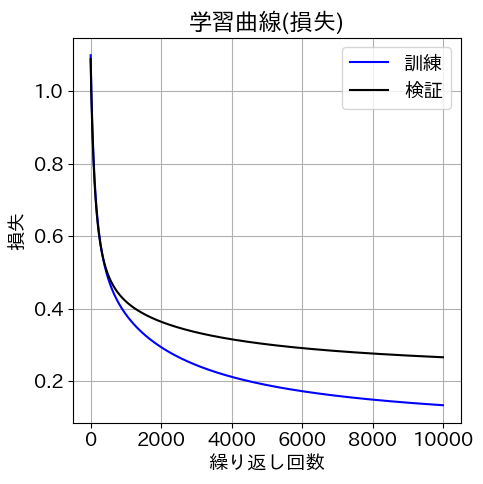

In [16]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

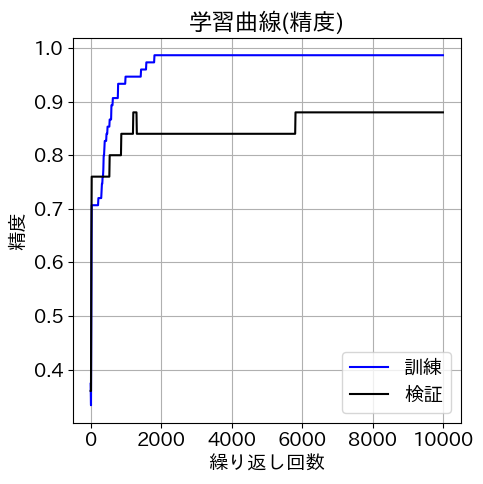

In [17]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

- 損失関数側にSoftmaxを含めたことにより，モデルがどのような値を吐いたのかがわからない
- ソフトマックスの値を取得してみる

In [18]:
# 正解データの0番目、2番目、3番目

print(labels[[0,2,3]])

tensor([0, 2, 2])


In [19]:
# 該当する入力値を抽出

i3 = inputs[[0,2,3],:]
print(i3.data.numpy())

[[5.4 1.7]
 [5.6 4.9]
 [7.7 6.7]]


In [20]:
# 出力値にsoftmax関数をかけた結果を取得

softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print(o3.data.numpy())
print(k3.data.numpy())

[[14.054476   10.409671   -0.16449963]
 [ 6.0416822  13.09368    15.364077  ]
 [ 7.739353   17.464848   20.995031  ]]
[[9.7453803e-01 2.5461271e-02 6.5099312e-07]
 [8.1024817e-05 9.3597002e-02 9.0632194e-01]
 [1.7005507e-06 2.8465455e-02 9.7153282e-01]]


In [21]:
# 重み行列
print(net.l1.weight.data)

# バイアス
print(net.l1.bias.data)

tensor([[ 3.1219, -2.6991],
        [ 1.4397,  0.7488],
        [-1.5617,  4.9503]])
tensor([ 1.7845,  1.3624, -0.1468])


tensor([4.4000, 7.9000], dtype=torch.float64)
tensor([2.9465, 5.0896], dtype=torch.float64)
tensor([2.2692, 3.9769], dtype=torch.float64)
tensor([3.5024, 6.0027], dtype=torch.float64)


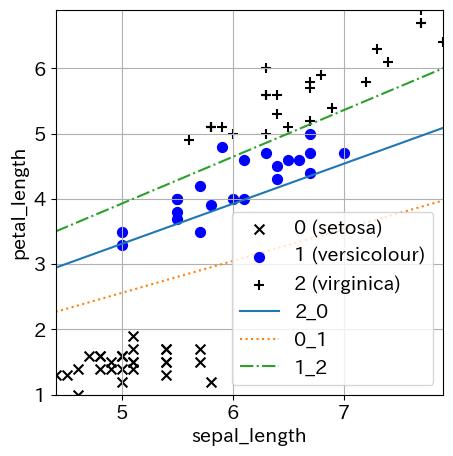

In [22]:
# x, yの描画領域計算
x_min = x_train[:,0].min()
x_max = x_train[:,0].max()
y_min = x_train[:,1].min()
y_max = x_train[:,1].max()
x_bound = torch.tensor([x_min, x_max])

# 結果確認
print(x_bound)

# 決定境界用の１次関数定義
def d_bound(x, i, W, B):
    W1 = W[[2,0,1],:]
    W2 = W - W1
    w = W2[i,:]
    B1 = B[[2,0,1]]
    B2 = B - B1
    b = B2[i]
    v = -1/w[1]*(w[0]*x + b)
    return v

# 決定境界のyの値を計算

W = net.l1.weight.data
B = net.l1.bias.data

y0_bound = d_bound(x_bound, 0, W, B)
y1_bound = d_bound(x_bound, 1, W, B)
y2_bound = d_bound(x_bound, 2, W, B)

# 結果確認
print(y0_bound)
print(y1_bound)
print(y2_bound)

# 散布図と決定境界の標示

# xとyの範囲を明示的に指定
plt.axis([x_min, x_max, y_min, y_max])

# 散布図
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')

# 決定境界
plt.plot(x_bound, y0_bound, label='2_0')
plt.plot(x_bound, y1_bound, linestyle=':',label='0_1')
plt.plot(x_bound, y2_bound,linestyle='-.',label='1_2')

# 軸ラベルと凡例
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()